In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [2]:
df=pd.read_csv("loan.csv")

In [10]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0.0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3.0,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2.0,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1.0,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
print(df.isnull().sum())

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [5]:
df_encoded=df.copy()

In [14]:
print(df_encoded['Gender'].value_counts())

Gender
Male      502
Female    112
Name: count, dtype: int64


In [15]:
df_encoded['Gender'].fillna('Male',inplace=True)

In [16]:
print(df_encoded['Married'].value_counts())

Married
Yes    401
No     213
Name: count, dtype: int64


In [17]:
df_encoded['Married'].fillna('Yes',inplace=True)

In [18]:
print(df_encoded['Dependents'].value_counts())

Dependents
0.0    360
1.0    102
2.0    101
3.0     51
Name: count, dtype: int64


In [ ]:
df_encoded['Dependents'].fillna(0,inplace=True)

In [19]:
print(df_encoded['Self_Employed'].value_counts())

Self_Employed
No     532
Yes     82
Name: count, dtype: int64


In [ ]:
df_encoded['Self_Employed'].fillna('No',inplace=True)

In [9]:
df_encoded['LoanAmount'].fillna(df_encoded['LoanAmount'].mean(),inplace=True)
df_encoded['Loan_Amount_Term'].fillna(df_encoded['Loan_Amount_Term'].mean(),
                                      inplace=True)

In [8]:
print(df_encoded['Credit_History'].value_counts())

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64


In [9]:
df_encoded['Credit_History'].fillna(1.0,inplace=True)

In [10]:
print(df_encoded.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [17]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [18]:
df_encoded['Loan_ID']=le.fit_transform(df_encoded['Loan_ID'].values)
df_encoded['Gender']=le.fit_transform(df_encoded['Gender'].values)
df_encoded['Married']=le.fit_transform(df_encoded['Married'].values)
df_encoded['Dependents']=le.fit_transform(df_encoded['Dependents'].values)
df_encoded['Education']=le.fit_transform(df_encoded['Education'].values)
df_encoded['Self_Employed']=le.fit_transform(df_encoded['Self_Employed'].
                                             values)
df_encoded['Credit_History']=le.fit_transform(df_encoded['Credit_History'].values)
df_encoded['Property_Area']=le.fit_transform(df_encoded['Property_Area'].values)
df_encoded['Loan_Status']=le.fit_transform(df_encoded['Loan_Status'].values)
df_encoded['ApplicantIncome']=le.fit_transform(df_encoded['ApplicantIncome'].
                                               values)
df_encoded['CoapplicantIncome']=le.fit_transform(df_encoded['CoapplicantIncome'].values)
df_encoded['LoanAmount']=le.fit_transform(df_encoded['LoanAmount'].values)
df_encoded['Loan_Amount_Term']=le.fit_transform(df_encoded['Loan_Amount_Term'].
                                                values)


In [19]:
print(df_encoded.head())

   Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0        0       1        0           0          0              0   
1        1       1        1           1          0              0   
2        2       1        1           0          0              1   
3        3       1        1           0          1              0   
4        4       1        0           0          0              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0              376                  0         100                 9   
1              306                 60          81                 9   
2              139                  0          26                 9   
3               90                160          73                 9   
4              381                  0          94                 9   

   Credit_History  Property_Area  Loan_Status  
0               1              2            1  
1               1              0            0  
2             

In [28]:
print(df_encoded.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [29]:
feature_cols=['Gender', 'Married', 'Dependents','Education', 
              'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 
              'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',]

In [30]:
from sklearn.model_selection import train_test_split
#x = df_encoded.iloc[:,0:12]
x=df_encoded[feature_cols]
y = df_encoded['Loan_Status']
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,
                                               random_state=1)

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score, 
classification_report
treeModel = DecisionTreeClassifier(random_state=0, max_depth=3, 
                                   criterion='gini')
treeModel.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=3, random_state=0)

In [32]:
PredictedOutput = treeModel.predict(X_test)

In [36]:
PredictedOutput

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1])

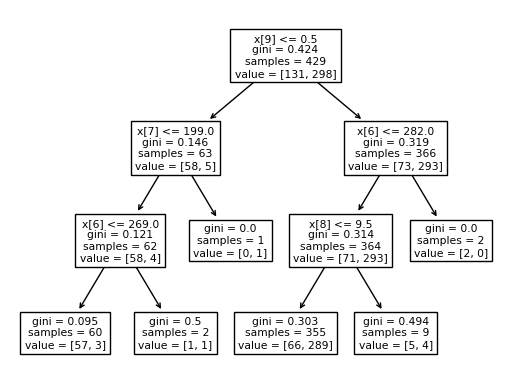

In [33]:
from sklearn import tree
tree.plot_tree(treeModel);

In [34]:
cm=confusion_matrix(y_test, PredictedOutput)
print(cm)
print(classification_report(y_test, PredictedOutput))

[[ 25  36]
 [  5 119]]
              precision    recall  f1-score   support

           0       0.83      0.41      0.55        61
           1       0.77      0.96      0.85       124

    accuracy                           0.78       185
   macro avg       0.80      0.68      0.70       185
weighted avg       0.79      0.78      0.75       185



In [35]:
accuracy=accuracy_score(y_test, PredictedOutput)
accuracy

0.7783783783783784